In [32]:
!pip install -q yfinance

In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

tech_list = ['ICICI', 'TCS', 'HDFC', 'INFY']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 25, end.month, end.day)

hdfc = yf.download("HDFCBANK.NS", start, end)
icici = yf.download("ICICIBANK.NS", start, end)
tcs = yf.download("TCS.NS", start, end)
infy = yf.download("INFY.NS", start, end)

company_list = [icici, tcs, hdfc, infy]
company_name = ["ICICI Bank Limited", "Tata Consultancy Services Ltd", "HDFC Bank Limited", "Infosys Ltd"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183353,2047540,ICICI Bank Limited
2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354349,5546354,ICICI Bank Limited
2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327988,5745267,ICICI Bank Limited
2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821434,3896601,ICICI Bank Limited
2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025368,3261038,ICICI Bank Limited


In [114]:
# Get the stock quote
df = pdr.get_data_yahoo('HDFCBANK.NS', start, end)
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-04-24,7.910000,8.000000,7.510000,7.885000,6.404643,2395000
1998-04-27,7.790000,8.000000,7.705000,7.760000,6.303112,2550000
1998-04-28,7.610000,7.890000,7.560000,7.810000,6.343724,3805000
1998-04-29,7.890000,8.140000,7.535000,7.625000,6.193458,3597000
1998-04-30,7.625000,7.700000,7.500000,7.680000,6.238131,1893000
...,...,...,...,...,...,...
2023-04-18,1670.000000,1677.250000,1656.400024,1659.599976,1659.599976,14818613
2023-04-19,1665.000000,1670.300049,1657.150024,1665.699951,1665.699951,12370584
2023-04-20,1671.699951,1677.449951,1666.400024,1671.900024,1671.900024,16461358


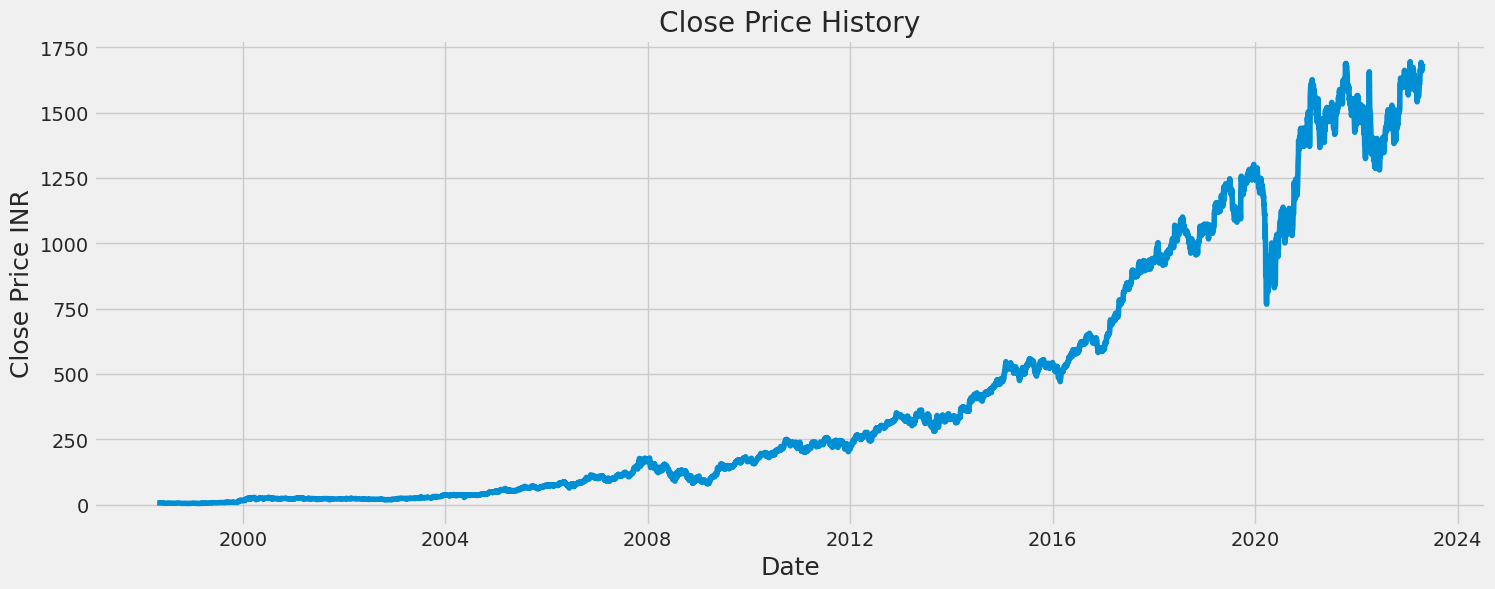

In [115]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [116]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5951

In [117]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00176565],
       [0.00169171],
       [0.00172128],
       ...,
       [0.98604047],
       [0.98763751],
       [0.99565245]])

In [118]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00176565, 0.00169171, 0.00172128, 0.00161185, 0.00164439,
       0.00164439, 0.00165326, 0.00165622, 0.00160298, 0.00160298,
       0.00147876, 0.00161777, 0.00142849, 0.00128653, 0.00146693,
       0.00142553, 0.00139595, 0.00140483, 0.00150538, 0.00138412,
       0.00138708, 0.00132202, 0.00136046, 0.00131019, 0.00124808,
       0.00120963, 0.00112386, 0.00094937, 0.00108837, 0.00109133,
       0.00104401, 0.0008636 , 0.00100852, 0.00087247, 0.00082811,
       0.00081628, 0.00060925, 0.00061517, 0.00089022, 0.00078375,
       0.00077487, 0.00054419, 0.00059446, 0.00070389, 0.00073051,
       0.00069502, 0.00069206, 0.0009612 , 0.00074234, 0.00060629,
       0.00047912, 0.00048208, 0.00046137, 0.00063883, 0.00065953,
       0.00083698, 0.00106767, 0.00119484, 0.00101739, 0.0011002 ])]
[0.0010528804762046625]

[array([0.00176565, 0.00169171, 0.00172128, 0.00161185, 0.00164439,
       0.00164439, 0.00165326, 0.00165622, 0.00160298, 0.00160298,
       0.00147876, 0.00161777, 0.

In [119]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5891/5891 [==============================] - 260s 43ms/step - loss: 9.1770e-04


In [106]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

24/24 [==============================] - 2s 43ms/step


34.477460092903875

<ipython-input-107-84462d6cf6c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


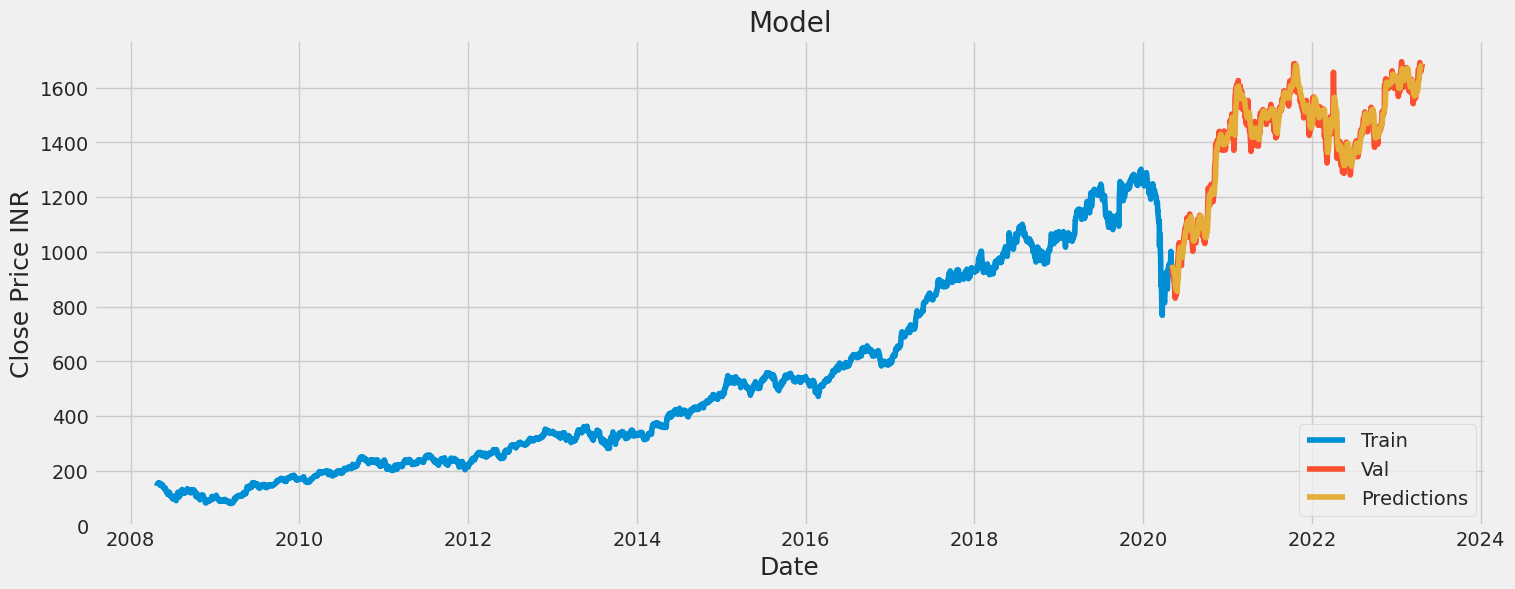

In [107]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [101]:
valid

,Close,Predictions
Date,,
2022-07-25,1396.599976,1385.066406
2022-07-26,1393.750000,1396.424072
2022-07-27,1404.400024,1404.254883
2022-07-28,1416.849976,1411.358032
2022-07-29,1434.199951,1419.241089
...,...,...
2023-04-18,1659.599976,1680.646118
2023-04-19,1665.699951,1675.812134
2023-04-20,1671.900024,1672.468994
